# Линейная регрессия

На основе набора данных об измерениях роста и веса решим следующую задачу.

Обучим модель линейной регрессии оценивать  вес человека. Для начала построим одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам (repwt). Для обучения линейной модели будем использовать класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Затем расширим набор признаков, добавив данные об измеренном и сообщенном весе, а также данные об поле человека. И оценим, как изменится среднеквадратическая ошибка.

В некоторых строках встречаются пропуски. Будем убирать их из таблицы вместе со всей строкой с помощью [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [45]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [47]:
random_point = 8 # For representation

In [48]:
# Using linear regression for the prediction of human height
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# Reading data
df = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
# Deliting NaN-values
df = df.dropna()
X = df.replace('M', 1).replace('F', 0).loc[:, ['sex', 'weight', 'repwt']]
y = df.loc[:, 'height']
# Dividing the total sample into training and test samples
x_train_3_signs, x_test_3_signs, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_point)
df_x_train = pd.DataFrame(x_train_3_signs, columns = ['sex', 'weight', 'repwt'])
df_x_test = pd.DataFrame(x_test_3_signs, columns = ['sex', 'weight', 'repwt'])
df_x_train.drop(columns = ['sex', 'repwt'], inplace = True)
df_x_test.drop(columns = ['sex', 'repwt'], inplace = True)
x_test_1_sign = df_x_test.values
x_train_1_sign = df_x_train.values

Linear regression (1 sign) - weight:
R^2 (1 sign) = 0.5651464381504732
MSE (1 sign) = 31.709, MAE (1 sign) = 4.170



Text(0, 0.5, 'Height (cm)')

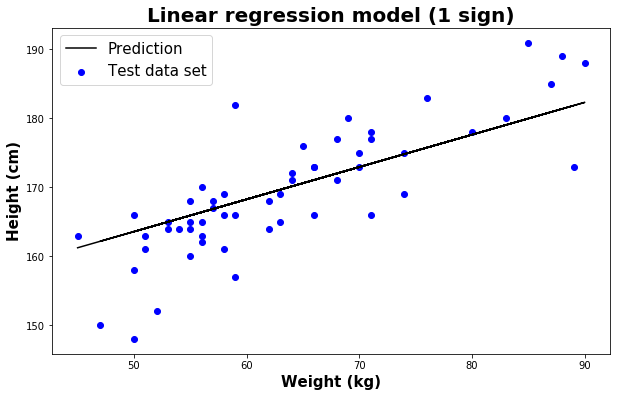

In [49]:
# Linear regression (1 sign)
skm = LinearRegression()
skm.fit(x_train_1_sign, y_train)
y_predict = skm.predict(x_test_1_sign) 
mse_1_sign = mean_squared_error(y_test, y_predict)
mae_1 = mean_absolute_error(y_test, y_predict)
print("Linear regression (1 sign) - weight:")
print("R^2 (1 sign) =", skm.score(x_train_1_sign, y_train))
print("MSE (1 sign) = %.3f, MAE (1 sign) = %.3f" % (mse_1_sign, mae_1))
print()

# Data visualization 
plt.figure(figsize=(10, 6))
plt.scatter(x_test_1_sign, y_test, color ='b')
y_predict = skm.predict(x_test_1_sign) 
plt.plot(x_test_1_sign, y_predict, 'k')
plt.title('Linear regression model (1 sign)', fontsize = 20, fontweight="bold")
plt.legend(['Prediction', 'Test data set'], fontsize = 15)
plt.xlabel("Weight (kg)", fontsize = 15, fontweight="bold")
plt.ylabel("Height (cm)", fontsize = 15, fontweight="bold")

Linear regression (3 signs) - sex, weight, repwt:
R^2 (3 signs) = 0.6532867292382812
MSE (3 signs) = 23.920, MAE (3 signs) = 3.631



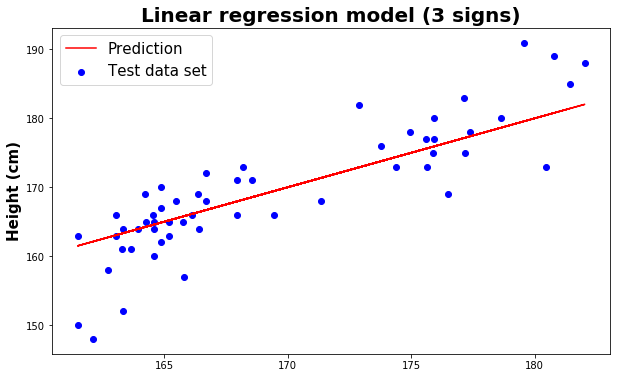

In [50]:
# Linear regression (3 signs)
skm.fit(x_train_3_signs, y_train)
print("Linear regression (3 signs) - sex, weight, repwt:")
print("R^2 (3 signs) =", skm.score(x_train_3_signs, y_train))
y_predict = skm.predict(x_test_3_signs) 
mse_3_signs = mean_squared_error(y_test, y_predict)
mae_3 = mean_absolute_error(y_test, y_predict)
print("MSE (3 signs) = %.3f, MAE (3 signs) = %.3f" % (mse_3_signs, mae_3))
print()
# Getting weights of model
coef = skm.coef_
coef = np.append(coef, skm.intercept_)
# Data visualization 
plt.figure(figsize=(10, 6))
# Reduction of the dimensionality
p1 = plt.scatter(x_test_3_signs['sex'].values * coef[0] + x_test_3_signs['weight'].values * coef[1] + \
                 x_test_3_signs['repwt'].values * coef[2] + coef[3], y_test, c = 'blue', label = "Test data set")
p2 = plt.plot(x_test_3_signs['sex'].values * coef[0] + x_test_3_signs['weight'].values * coef[1] + \
                 x_test_3_signs['repwt'].values * coef[2] + coef[3], y_predict, c = 'red', label = "Prediction")
plt.legend(fontsize = 15)
plt.title('Linear regression model (3 signs)', fontsize = 20, fontweight="bold")
plt.ylabel("Height (cm)", fontsize = 15, fontweight="bold")
plt.show()

In [51]:
print("The mean square error (MSE), when expanding the feature space, decreased by {:.2f}%".format((1 - mse_3_signs / mse_1_sign) * 100))

The mean square error (MSE), when expanding the feature space, decreased by 24.56%
